In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [134]:
df=pd.read_csv('ClassicHit.csv')
df.sample(3)


,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
1462,You Shook Me,Willie Dixon,1962,255226,3,0.338,0.2510,5,-17.826,1,0.0360,0.650,0.019000,0.2690,0.587,183.015,25,Blues
8691,Conga,Miami Sound Machine,1986,254000,4,0.789,0.6560,2,-14.825,1,0.0474,0.168,0.040900,0.0311,0.865,122.237,65,Pop
3997,Where Have All the Flowers Gone - 2004 Remaster,"Peter,Paul and Mary",1963,236906,1,0.400,0.0887,10,-16.696,1,0.0328,0.911,0.000026,0.1080,0.286,106.967,42,Folk


In [5]:
df.columns


Index(['Track', 'Artist', 'Year', 'Duration', 'Time_Signature', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity',
       'Genre'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,15150.0,1984.709769,19.482460,1899.000000,1971.000000,1983.000000,1998.00000,2024.000
Duration,15150.0,241302.814983,105796.634810,23000.000000,180370.000000,222852.500000,275153.00000,3060650.000
Time_Signature,15150.0,3.921650,0.348322,0.000000,4.000000,4.000000,4.00000,5.000
Danceability,15150.0,0.574667,0.166208,0.000000,0.461000,0.582000,0.69600,0.988
Energy,15150.0,0.617691,0.239527,0.000098,0.442000,0.644000,0.81900,0.999
Key,15150.0,5.257624,3.569713,0.000000,2.000000,5.000000,8.00000,11.000
Loudness,15150.0,-9.154545,4.289558,-47.359000,-11.736750,-8.480500,-5.95550,0.919
Mode,15150.0,0.696634,0.459727,0.000000,0.000000,1.000000,1.00000,1.000
Speechiness,15150.0,0.075791,0.077704,0.000000,0.034325,0.046400,0.07840,0.950
Acousticness,15150.0,0.302651,0.317793,0.000001,0.024225,0.167000,0.55700,0.996


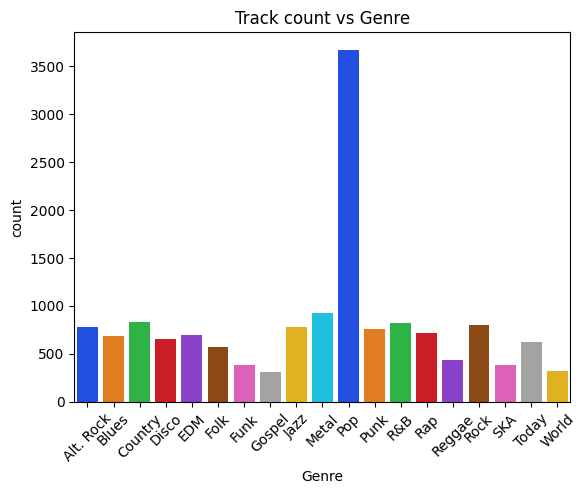

In [11]:
# count of tracks for each genre
sns.countplot(data=df,x='Genre',palette='bright')
plt.xticks(rotation=45)
plt.title('Track count vs Genre')
plt.show()


In [46]:
df['Genre'].unique()


array(['Alt. Rock', 'Blues', 'Country', 'Disco', 'EDM', 'Folk', 'Funk',
       'Gospel', 'Jazz', 'Metal', 'Pop', 'Punk', 'R&B', 'Rap', 'Reggae',
       'Rock', 'SKA', 'Today', 'World'], dtype=object)

In [71]:
# Most popular Band in  (Alt. Rock, Rock, Metal & Punk)

df1=df[['Track','Artist', 'Year', 'Duration','Popularity','Genre']]
genre_fil = df1[df1['Genre'].isin(['Alt. Rock', 'Rock', 'Metal', 'Punk'])]
genre_fil.shape


(3255, 6)

In [86]:
x1=genre_fil.groupby(['Genre', 'Artist'])['Popularity'].sum().reset_index()
x1=genre_fil.sort_values(by=['Popularity'], ascending=[False])

top_artists_by_genre= x1.groupby('Genre').head(1).reset_index(drop=True)
top_artists_by_genre


,Track,Artist,Year,Duration,Popularity,Genre
0,Iris,The Goo Goo Dolls,1998,289533,88,Alt. Rock
1,Sweet Child O' Mine,Guns N' Roses,1987,356066,86,Metal
2,Starman,David Bowie,1972,254000,77,Rock
3,Dammit,blink-182,1997,165373,68,Punk


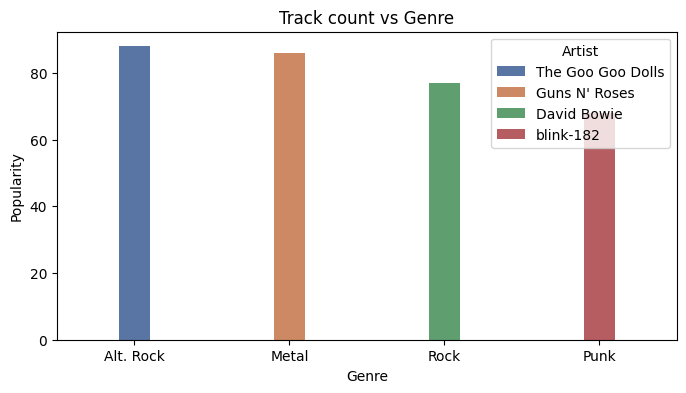

In [163]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top_artists_by_genre,x='Genre',y='Popularity',hue='Artist',palette='deep',width=.2)
plt.title('Track count vs Genre')
plt.show()


                                                   Track      Genre  \
222                                   Goodbye Sky Harbor  Alt. Rock   
1441                                           East-West      Blues   
2180                                   Travelin' Soldier    Country   
2476                               Love To Love You Baby      Disco   
3293                                  The Messenger 2012        EDM   
3657                        Alice's Restaurant Massacree       Folk   
4584                             Say What Whip It (Live)       Funk   
4836                                 There's an Overflow     Gospel   
5493                              Free Jazz - Pts. 1 & 2       Jazz   
5948           A Change of Seasons - The Crimson Sunrise      Metal   
8738                                       Tubular Bells        Pop   
10676                                        The Decline       Punk   
11321                       By The Time I Get To Phoenix        R&B   
12105 

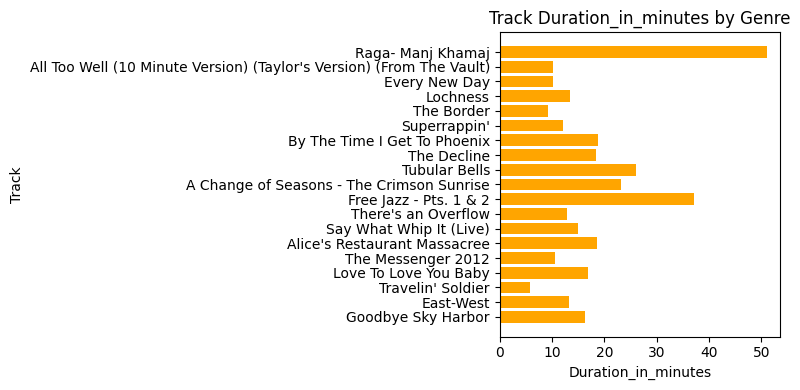

In [127]:
#Longest songs in each genre

df['Dur_in_min'] = df['Duration'] / 60000
lngty = df.loc[df.groupby('Genre')['Duration'].idxmax()]
print(lngty[['Track','Genre','Dur_in_min']])

plt.figure(figsize=(8, 4))
plt.barh(lngty['Track'], lngty['Dur_in_min'], color='orange')
plt.xlabel('Duration_in_minutes')
plt.ylabel('Track')
plt.title('Track Duration_in_minutes by Genre')
plt.tight_layout()
plt.show()


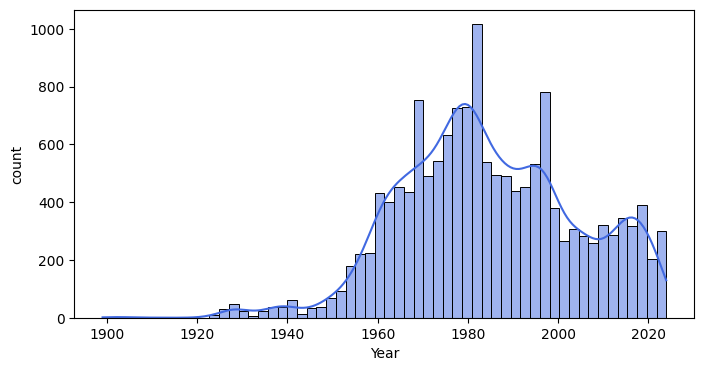

In [133]:
#Song count by each year

plt.figure(figsize=(8, 4))
sns.histplot(df['Year'],kde=True, color='royalblue')
plt.xlabel('Year')
plt.ylabel('count')
plt.show()


In [154]:
#Most Instrumental song in each Genre
df3=df[['Track', 'Artist', 'Year','Instrumentalness','Popularity','Genre']]

df3['Track']=df3['Track'].str.slice(0,10) #slicing long Track name

x3=df3.groupby(['Genre'])['Instrumentalness'].max()
x3=df3.sort_values(by=['Instrumentalness'], ascending=[False])

top_ins= x3.groupby('Genre').head(1).reset_index(drop=True)
top_ins


,Track,Artist,Year,Instrumentalness,Popularity,Genre
0,Rain,Madonna,1993,0.987,81,Pop
1,Sandstorm,Darude,1999,0.985,70,EDM
2,Damaged II,Black Flag,1981,0.976,28,Punk
3,Battle Hym,Judas Priest,1990,0.973,36,Rock
4,Wave,Buddy Rich,1967,0.970,20,Jazz
5,Rambler,Bill Frisell,1987,0.967,23,World
6,Coal Creek,Pete Seeger,1961,0.960,9,Folk
7,Bankshot -,Operation Ivy,2007,0.959,39,SKA
8,Pony Blues,Charley Patton,1929,0.957,10,Blues
9,The Moil,Galactic,1998,0.952,11,Funk


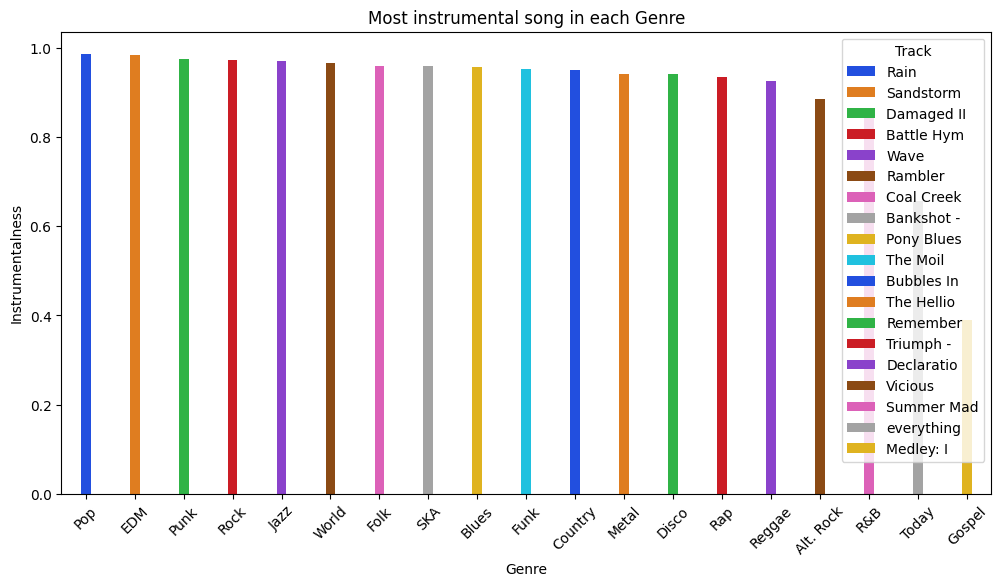

In [167]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_ins,x='Genre',y='Instrumentalness',hue='Track',palette='bright',width=0.2)
plt.xticks(rotation=45)
plt.title('Most instrumental song in each Genre')
plt.show()


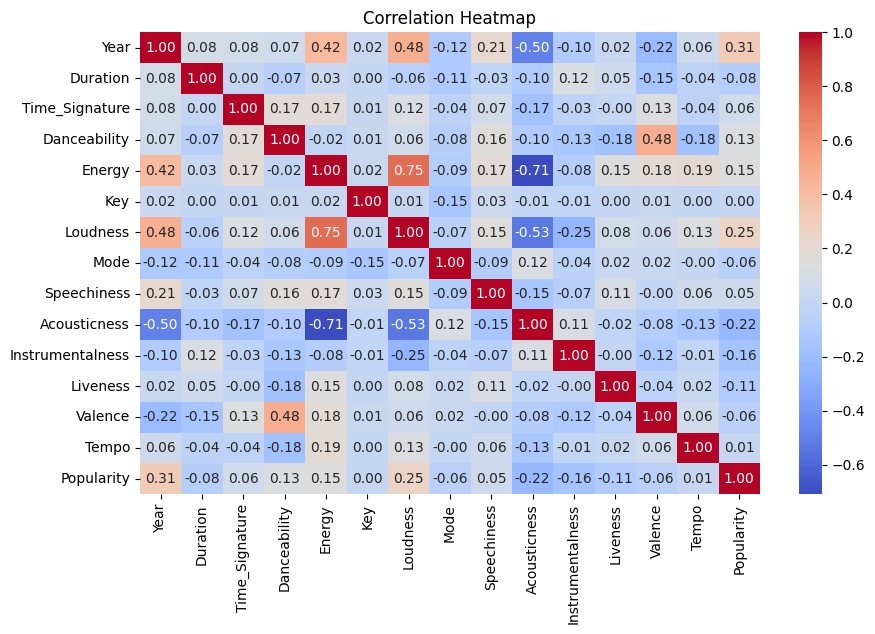

In [169]:
# Select only numeric columns for correlation analysis
num_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = num_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


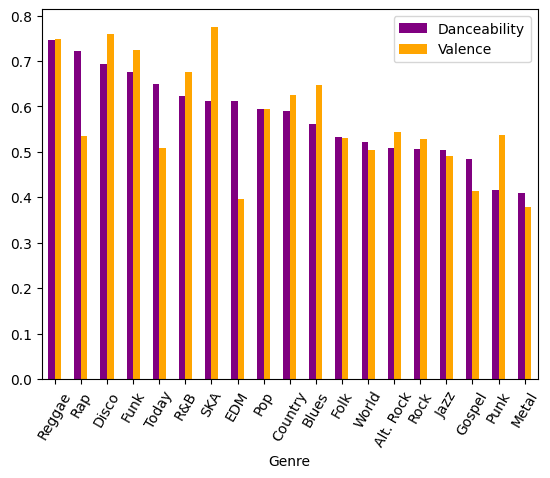

In [197]:
#Genre wise dancebility & valence for artists having 5 or more songs.
r2=df.groupby('Genre')[['Danceability','Valence']].mean()
r2=r2.sort_values(by='Danceability',ascending=False)

#Plotting
r2.plot.bar(rot=60,color=['purple','orange'])
plt.show()
